In [1]:
import pickle
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Get the path of the current script (or current working directory)
parent_dir = os.path.dirname(os.getcwd())
# Append the parent directory to sys.path
sys.path.append(parent_dir)

import src
from src.PrePipelineSteps import Pycromanager2NativeDataType, Make_Output_Dir_JF, Make_Analysis_Dir_JF, \
                                    ConsolidateImageShapes, TrimZSlices, AutomaticSpotDetection_JF

from src.PipelineSteps import CellSegmentationStepClass_JF, BIGFISH_SpotDetection, SimpleCellposeSegmentaion, ParamOptimizer_BIGFISH_SpotDetection, \
                                TrackPy_SpotDetection

from src.PostPipelineSteps import BuildPDFReport, SaveSpotDetectionResults, SaveMasksToAnalysis, SendAnalysisToNAS, \
                                    DeleteTempFiles, TrackPyAnlaysis

                            

from src import Experiment, PipelineSettings, ScopeClass, PipelineDataClass, Pipeline

from pycromanager import Dataset

def save_dict_to_file(dic, location):
    f = open(location,'w')
    f.write(str(dic))
    f.close()

In [2]:
ds = Dataset(r'\\munsky-nas.engr.colostate.edu\share\RNA_diffusion_data\03052024_H128_IntronDiffusion\H128FastVids_5ms_0ND_green_40mw_5')

Dataset opened                 


In [3]:
kwargs = {'nucChannel': [0], 'FISHChannel': [0],
          'user_select_number_of_images_to_run': 5, 
          'spot_yx': 450, 
          'spot_z': 750, 
          'bigfish_alpha': 0.5, 
          'bigfish_beta': 1, 
          'bigfish_gamma': 5, 
          'use_log_hook': False,
          'timestep_s': (5+20) * 1e-3, # convert ms to s
          'analysis_location': None,
          'trackpy_minmass': 300,
          'sub_pixel_fitting': False,
          'trackpy_max_lagtime': 200
          }

In [4]:
compiler = src.SingleStepCompiler(ds, kwargs)


In [5]:
compiler.run_sliders([('bigfish_alpha', 'slider', (0, 1))], BIGFISH_SpotDetection)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Jack\\miniconda3\\envs\\FISH_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Jack\\miniconda3\\envs\\FISH_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Ja

========================== Running cell 0 ==========================
detected spots after gaussian kernel
 shape: (161, 2)
 threshold: 48.0


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MTCORSVA.TTF', name='Monotype Corsiva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuiz.ttf', name='Segoe UI', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUAB.TTF', name='Book Antiqua', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTB.TTF', name='Calisto MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAXDI.TTF', name='Lucida Fax', style='italic', variant='normal', weight=600, stre

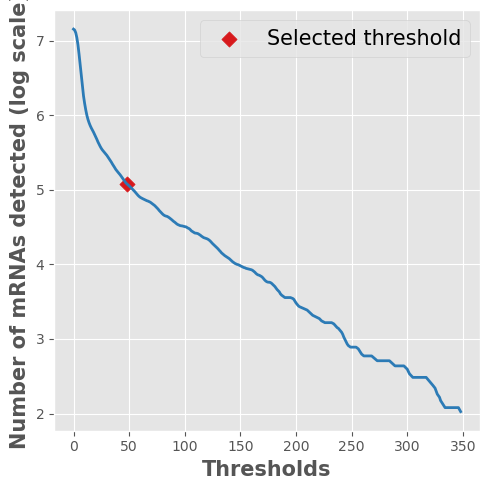

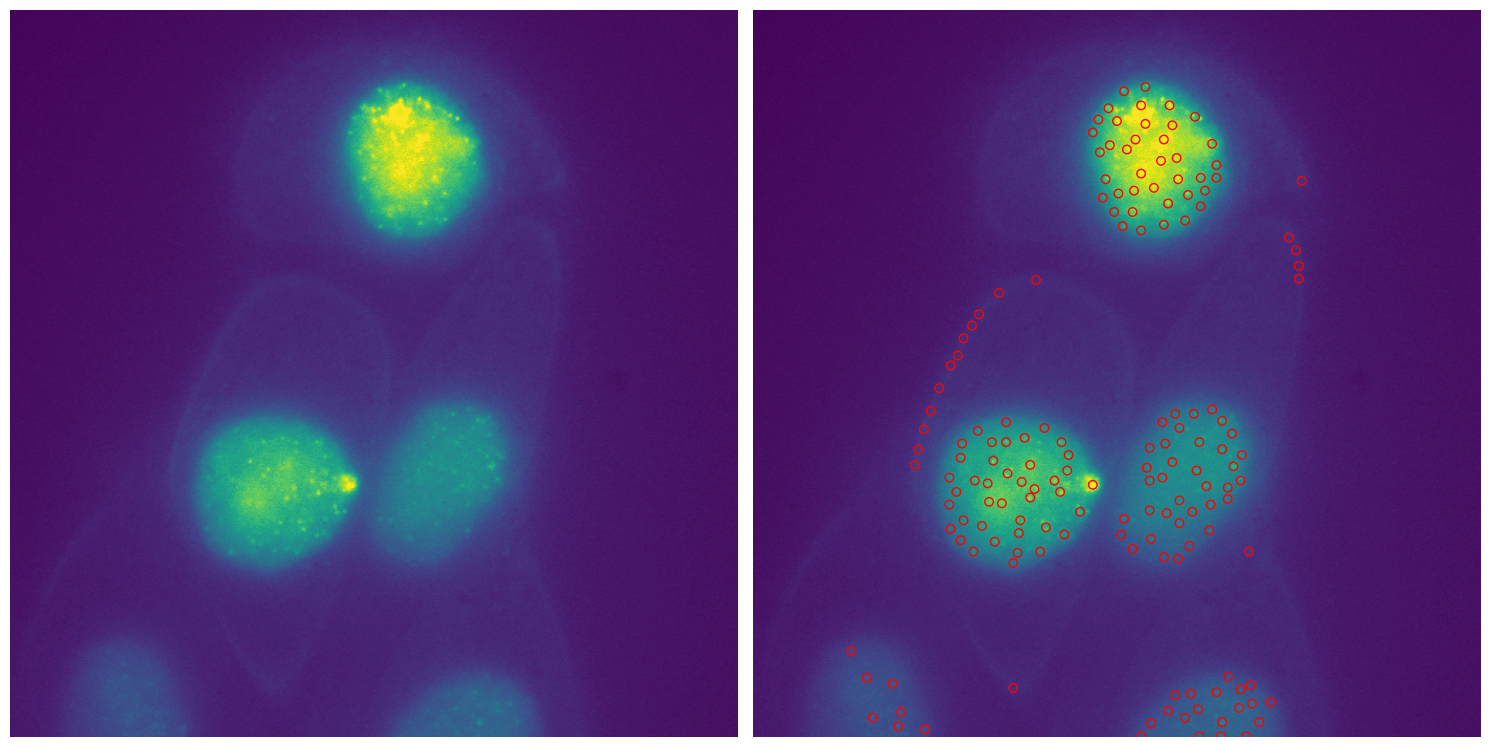

ValueError: Invalid integer data type 'f'.

In [5]:
output = compiler.sudo_run_step(BIGFISH_SpotDetection)
compiler.kwargs = {**compiler.kwargs, **output.__dict__}
output = compiler.sudo_run_step(TrackPyAnlaysis)

In [ ]:
output[0]